In [1]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


/tmp/ipython-input-2-1450436537.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-2-1450436537.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

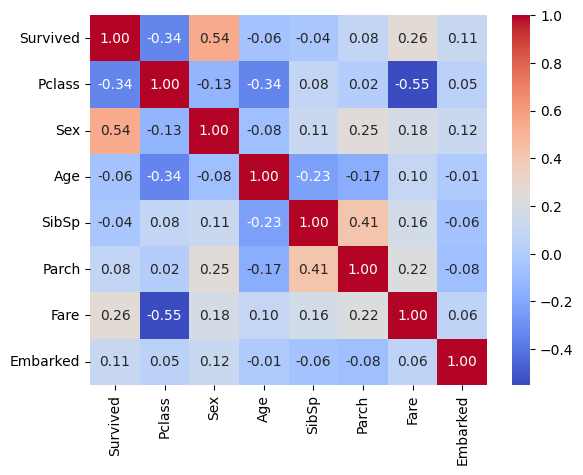

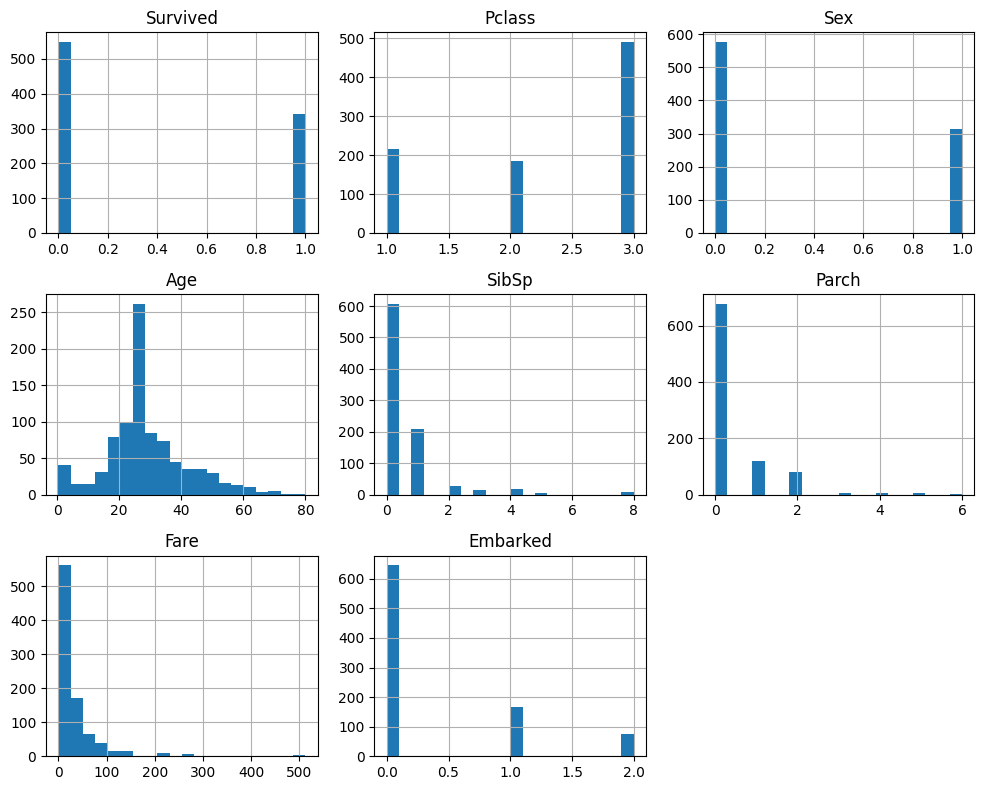

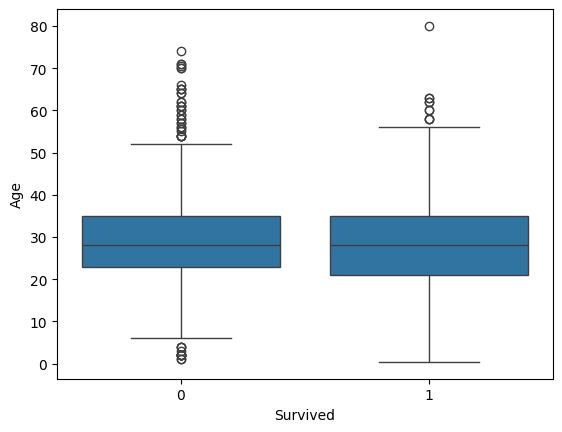

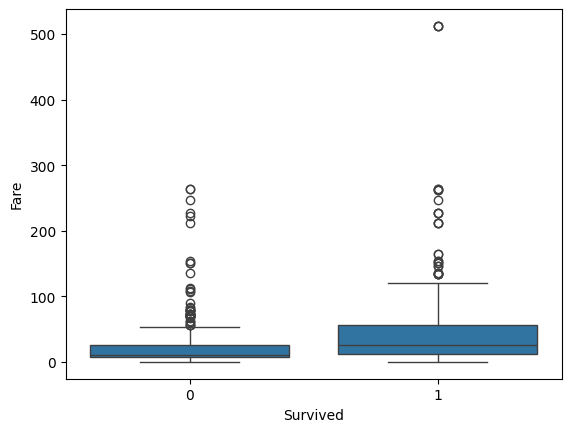

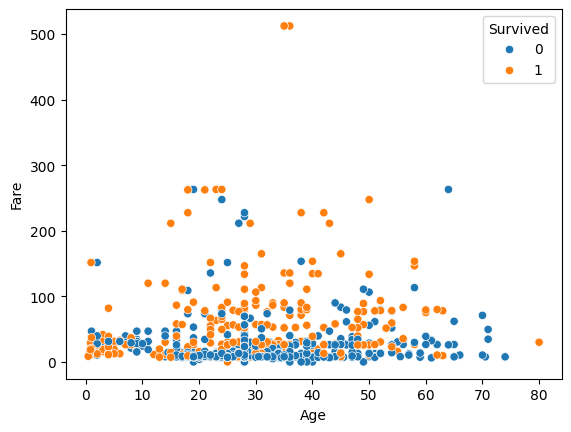

EDA-based model accuracy: 0.7988826815642458


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv("train.csv")
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

df.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

sns.boxplot(data=df, x="Survived", y="Age")
plt.show()

sns.boxplot(data=df, x="Survived", y="Fare")
plt.show()

sns.scatterplot(data=df, x="Age", y="Fare", hue="Survived")
plt.show()

X = df.drop("Survived", axis=1)
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("EDA-based model accuracy:", accuracy_score(y_test, pred))
